 **Задание 4 (дополнительное) Пользовался информацией из статьи на Хабре https://habr.com/ru/articles/575130/.**

# Задание 1. Загрузка данных и визуализация

В этом задании мы познакомимся подробнее с тем, как работать с табличными данными и визуализировать их.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

Загрузите [Wine Data Set](https://archive.ics.uci.edu/ml/datasets/wine)

Удобный способ сделать это — использовать модуль [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

In [ ]:
# Download dataset
data, labels = load_wine(return_X_y=True, as_frame=True)

И `data`, и `labels` — это N-мерные массивы. **Посмотрите, какие у них размеры**

In [ ]:
# Your code here


И какие метки классов представлены.

In [ ]:
# Your code here


Выведем первые 3 строки датасета.

In [ ]:
data.head(3)

По умолчанию Pandas выводит всего 20 столбцов и 60 строк, поэтому если ваш датафрейм больше, воспользуйтесь функцией `set_option`:

```
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)
```

Текущее значение параметра можно вывести подобным образом:

```
pd.get_option("display.max_rows")
```

Выведите, какие значения сейчас, и поменяйте их так, чтобы открывался весь датафрейм.

In [ ]:
# Your code here

In [ ]:
# Your code here


Верните значения обратно к тем, что были по умолчанию.

In [ ]:
# Your code here

Выведем названия столбцов:

In [ ]:
print(data.columns)

Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом `info`:

In [ ]:
print(data.info())

В нашем случае все колонки имеют тип `float64`.

* **float64**: число с плавающей точкой от $4.9*10^{-324}$ до $1.8*10^{308}$, занимает 8 байт.

Кажется избыточным с учетом разброса значений в колонках. Кстати, какой он? Посмотрим на первые три колонки. Если убрать имена столбцов, то будет выведена вся статистика.

[NumPy Standard Data Types](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html#NumPy-Standard-Data-Types)

In [ ]:
data[['alcohol','malic_acid','ash']].describe()

Метод `describe` показывает основные статистические характеристики данных по каждому *числовому признаку*: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

**Изменить тип колонки** можно с помощью метода `astype`. Применим этот метод к признаку *alcohol* и переведём его в int16:

In [ ]:
data['alcohol'] = data['alcohol'].astype('int16')

Переведите остальные признаки в подходящие типы и проверьте, что типы поменялись.

In [ ]:
# Your code here

**Сортировка**

DataFrame можно отсортировать по значению какого-нибудь из признаков. Например, по *alcohol* (`ascending=False` для сортировки по убыванию):

In [ ]:
data.sort_values(by='alcohol', ascending=False).head()

Сортировать можно и по группе столбцов, подав список с названиями. Попробуйте.

In [ ]:
# Your code here

**Индексация и извлечение данных**

DataFrame можно индексировать по-разному. Для извлечения отдельного столбца можно использовать конструкцию вида `DataFrame['Name']`. Для логической индексации — `df[P(df['Name'])]`, где $P$ — это некоторое логическое условие, проверяемое для каждого элемента столбца *Name*.

Воспользуемся этим для ответа на вопрос: какое среднее содержание магния в алкоголе с крепостью ниже $12\%$?

In [ ]:
data['magnesium'][data['alcohol'] <= 12].mean()

Pandas позволяет комбинировать условия через логические операции. Сформулируйте какое-нибудь составное условие.

In [ ]:
# Your code here

**Применение функций к ячейкам, столбцам и строкам**

Применение функции **к каждому столбцу**: `apply`.




In [ ]:
data.apply(np.max)

Метод apply можно использовать и для того, чтобы применить функцию к каждой строке. Для этого нужно указать `axis=1`. Попробуйте.

In [ ]:
# Your code here

Применение функции **к каждой ячейке** столбца: `map`.

Например, метод map можно использовать для замены значений в колонке, передав ему в качестве аргумента словарь вида `{old_value: new_value}`.

In [ ]:
d = {2 : 'low', 3 : 'low'}
data['ash'] = data['ash'].map(d)
data.head(2)

Попробуйте какую-нибудь свою замену. Например, вы можете подать **lambda-функцию**.

[Лямбда-функции в Python](https://habr.com/ru/companies/piter/articles/674234/)

In [ ]:
# Your code here

**Группировка данных**

В общем случае группировка данных в Pandas выглядит следующим образом:

`df.groupby(by=grouping_columns)[columns_to_show].function()`

Например, выведем статистики по трём столбцам в зависимости от значения признака alcohol.

In [ ]:
columns_to_show = ['malic_acid', 'total_phenols', 'proanthocyanins']

data.groupby(['alcohol'])[columns_to_show].describe(percentiles=[])

Сделаем то же самое, но немного по-другому, передав в agg список функций:

In [ ]:
data.groupby(['alcohol'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Когда данных много, просто смотреть на цифры крайне неинформативно.

Для визуализации данных в этом курсе мы будем использовать библиотеку `matplotlib`. **Давайте её импортируем**.

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(4,3))
labels.hist()
plt.suptitle("Label balance")
plt.show()

Объединим данные и метки в один фрейм. Нам это потребуется для упрощения визуализации.

In [ ]:
df = pd.concat([data, labels], axis=1)

Теперь мы можем посмотреть, как меняется средняя крепость алкоголя в зависимости от значения метки в *target*. Реализация функции `plot` в `pandas` основана на библиотеке `matplotlib`.

Здесь `show()` позволяет нам убрать служебные сообщения.

In [ ]:
df.groupby('target')['alcohol'].mean().plot(legend=True)
plt.show()

C помощью параметра kind можно изменить тип графика, например, на **bar chart**. `Matplotlib` позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр `rot` отвечает за угол наклона подписей к оси `x`

In [ ]:
df.groupby('target')['alcohol'].mean().plot(kind='bar', legend=True, rot=45)
plt.show()

**Seaborn**

Теперь давайте перейдем к библиотеке `seaborn`. `Seaborn` — более высокоуровневое API на базе библиотеки `matplotlib`. `Seaborn` содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в `matplotlib` потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

In [ ]:
import seaborn as sns

data, labels = load_wine(return_X_y=True, as_frame=True)
df = pd.concat([data, labels], axis=1)
cols = ['alcohol', 'malic_acid', 'ash', 'target']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные `scatter plots` для соответствующих пар признаков.

Для сохранения графиков в файлы стоит использовать метод `savefig`.

Выведите аналогичный график по иным 5 колонкам.

In [ ]:
# Your code here


С помощью `seaborn` можно построить и распределение dist plot. Для примера посмотрим на распределение `color_intensity`. Обратите внимание, что так тоже можно обращаться к колонкам.

In [ ]:
sns.histplot(df.color_intensity, kde=True)
plt.show()

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и `joint plot` — это гибрид `scatter plot` и `histogram`. Посмотрим на то, как связаны между собой 5 наиболее крепких напитков и `flavanoids`.

In [ ]:
top_alcohol = df.alcohol.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="alcohol", x="flavanoids", data=df[df.alcohol.isin(top_alcohol)], orient="h")
plt.show()

`Box plot` состоит из коробки (поэтому он и называется `box plot`), усов и точек (иначе его называют *ящик с усами*). Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток ($Q1 - 1.5*IQR$, $Q3 + 1.5*IQR$), где $IQR = Q3 - Q1$ — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

[[wiki] Box plot](https://en.wikipedia.org/wiki/Box_plot)

**Постройте свой ящик с усами!** Для этого выберите какую-нибудь подвыборку данных, которую можно визуально анализировать.

In [ ]:
# Your code here

Последний график, который рассмотрим в этом задании — это **heat map**. Сгруппируем значения крепости в 5 бинов (примерно такой же подход при построении гистограмм), и посмотрим на распределение численного признака (`proanthocyanins`) по двум категориальным.

In [ ]:
df['alcoholGroup'] = pd.cut(df['alcohol'], bins=5)

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='target',
                        columns='alcoholGroup',
                        values='proanthocyanins',
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.05)
plt.show()

Постройте аналогичную тепловую карту. Быть может, вы ожидаете какие-то закономерности?

In [ ]:
# Your code here

В дальнейших лекциях и заданиях на основе подобных визуализаций и подсчётов вы будете производить разведочный анализ и строить гипотезы о том, какой **baseline** можно получить, выведя грубую (или не очень) связь между данными и целевой переменной.

В следующем задании вы продложите анализ датасета.

## Формат результата

Результат выполнения — таблицы и графики.

# Задание 2. Алгоритм Nearest Neighbors

Хотя в лекции дан пример для изображений, реализация для табличных данных будет проще либо вообще может не отличаться от предложенной. В данном задании требуется самостоятельно реализовать алгоритм k-NN и применить его.

P.S. Nearest Neighbor — это k-Nearest Neighbors при $k = 1$.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Загрузим датасет:

In [ ]:
# Download dataset
data, labels = load_wine(return_X_y=True)

Разбейте ваши данные на тренировочную, валидационную и тестовую подвыборки.

Вам пригодится метод `train_test_split()`. Выделите на обучение $60\%$ данных, не забудьте про фиксирование `seed` генератора и *стратификацию* (параметры `random_state=42`, `stratify`).

In [ ]:
# Your code here
x_train, x_tmp, y_train, y_tmp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size=0.2, random_state=42, stratify=y_tmp)

In [ ]:
print("x_train", x_train.shape)
print("x_test", x_val.shape)
print("x_test", x_test.shape)

x_train (142, 13)
x_test (28, 13)
x_test (8, 13)


Напишите функцию, которая считает расстояние L1 между 2-мя векторами.


In [ ]:
def compute_L1(a, b):
    return np.sum(np.abs(a - b)) # Your code here

Возьмите первую строку из валидационного набора. Посчитайте расстояние L1 от нее до всех строк тренировочного набора.

В простейшем виде напишите `for loop`. Если вы знаете, что вы делаете, можете использовать *векторизацию*.

In [ ]:
distances = []
for i in range(len(x_train)):
    distances.append(compute_L1(x_val[0], x_train[i]))

In [ ]:
# Your code here
np.array(distances).shape

(142,)

Найдите индекс минимального расстояния.

Используйте `np.argmin()`.

In [ ]:
# Your code here
indx = np.argmin(distances)
indx


1

Выведите на экран свойства первого ириса в валидационном наборе и ириса, который максимально на него похож в тренировочном (по минимальному расстоянию).

In [ ]:
# Your code here
print(x_val[0])
print(x_train[indx])

[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
 1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
[1.373e+01 1.500e+00 2.700e+00 2.250e+01 1.010e+02 3.000e+00 3.250e+00
 2.900e-01 2.380e+00 5.700e+00 1.190e+00 2.710e+00 1.285e+03]


Выведите их метки

In [ ]:
# Your code here
print(y_val[0])
print(y_train[indx])

0
0


Напишите функцию для рассчёта двумерного массива расстояний между двумя выборками (от каждого объекта в первой выборке до каждого объекта во второй выборке).

Рекомендуем заранее создать массив расстояний и заполнить его каким-нибудь очень маленьким числом (например, `np.inf`). Так вы сразу будете отлаживать алгоритм по размерности, а ещё это не будет требовать повторных выделений памяти при росте размера массива.

In [ ]:
def compute_distances(train, sub, distance_func):
    # Your code here
    distances = np.full((sub.shape[0], train.shape[0]), np.inf)
    for i in range(sub.shape[0]):
       for j in range(train.shape[0]):
         distances[i,j] = distance_func(sub[i], train[j])
    return distances

In [ ]:
distances = compute_distances(x_train, x_val, compute_L1)

In [ ]:
distances.shape

(28, 142)

In [ ]:
distances[12]

array([290.43    , 692.13    , 609.44    , 739.38    ,  66.14    ,
       166.479999, 169.64    , 141.51    , 791.81    , 460.      ,
        61.22    , 215.39    , 195.34    , 325.11    ,  18.25    ,
       155.4     , 291.02    , 288.68    , 251.92    , 695.35    ,
        83.93    , 294.07    , 574.86    ,  77.06    ,  80.69    ,
       590.44    , 573.14    , 141.43    , 255.75    , 922.47    ,
       149.45    , 699.56    , 691.65    , 724.38    , 212.      ,
        28.79    , 254.77    , 130.57    , 423.99    ,  89.53    ,
       431.8     , 207.18    , 118.57    , 125.45    , 128.22    ,
        89.51    , 461.78    , 395.58    , 231.86    , 216.88    ,
       491.24    , 209.94    , 280.01    ,  58.52    , 111.85    ,
       253.77    , 160.48    , 163.66    , 136.4     , 459.3     ,
       156.22    , 132.62    , 675.73    , 392.97    , 172.2     ,
       665.3     , 293.98    , 180.2     , 353.57    , 267.3     ,
       149.77    ,  48.17    ,  82.76    , 449.22    , 111.89 

Определите точность Nearest Neighbors классификации на **валидационном** наборе.

Для этого найдите индекс минимального значения для каждой строки массива distances.

In [ ]:
# Your code here
indx_distances = []
for i in range(len(distances)):
    indx_distances.append(np.argmin(distances[i]))

In [ ]:
indx_distances

[1,
 62,
 85,
 98,
 68,
 104,
 138,
 78,
 136,
 138,
 116,
 127,
 14,
 126,
 29,
 120,
 139,
 13,
 129,
 29,
 29,
 136,
 60,
 112,
 4,
 23,
 106,
 20]

Теперь создадим массив `predicted_class`

In [ ]:
predicted_class = y_train[indx_distances]

И посмотрим, где класс предсказан правильно, а где нет.

In [ ]:
y_val == predicted_class

array([ True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True])

**Посчитайте точность (accuracy)**

В Python с булевыми значениями можно производить математические операции (`True = 1, False = 0`). Значение accuracy должно быть более $65\%$.

In [ ]:
accuracy_val = np.sum(y_val == predicted_class)/len(y_val == predicted_class) # Your code here
print(f'Accuracy = {accuracy_val * 100:.1f}%')

Accuracy = 75.0%


**Посчитайте точность (accuracy) для валидацинного набора**

In [ ]:
# Your code here
distances_test = compute_distances(x_train, x_test, compute_L1)
indx_distances_test = []
for i in range(len(distances_test)):
    indx_distances_test.append(np.argmin(distances_test[i]))
predicted_class_test = y_train[indx_distances_test]

In [ ]:
y_test == predicted_class_test

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
accuracy_test = np.sum(y_test == predicted_class_test)/len(y_test == predicted_class_test)
print(f"Accuracy = {accuracy_test * 100:.1f}%")

Accuracy = 100.0%


Повторите все этапы классификации, однако в этот раз **стандартизируйте** данные перед этим. Величина accuracy должна увеличиться.

In [ ]:
# Your code here
from sklearn.preprocessing import StandardScaler

In [ ]:
#x_train, x_tmp, y_train, y_tmp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
#x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size=0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)  # scaling data
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)  # scaling data

In [ ]:
distances_sc = compute_distances(x_train_norm, x_val_norm, compute_L1)  # Your code here

In [ ]:
indx_distances_sc = []
for i in range(len(distances_sc)):
    indx_distances_sc.append(np.argmin(distances_sc[i]))
predicted_class_sc = y_train[indx_distances_sc]


In [ ]:
indx_distances_sc = distances_sc.argmin(axis=1)

In [ ]:
predicted_class_sc = y_train[indx_distances_sc]

In [ ]:
y_val == predicted_class_sc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
accuracy_val = np.mean(y_val == predicted_class_sc)
print(f'Accuracy = {accuracy_val * 100:.1f}%')

Accuracy = 96.4%


**Посчитайте точность (accuracy) для тестового набора**

Теперь учтём, что у нас осталась **тестовая подвыборка**. Проведите необходимые операции и посчитайте accuracy на ней.  

In [ ]:
# Your code here
distances_sc_test = compute_distances(x_train_norm, x_test_norm, compute_L1)

In [ ]:
indx_distances_sc_test = []
for i in range(len(distances_sc_test)):
    indx_distances_sc_test.append(np.argmin(distances_sc_test[i]))
predicted_class_sc_test = y_train[indx_distances_sc_test]

In [ ]:
y_test == predicted_class_sc_test

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
accuracy_test = np.sum(y_test == predicted_class_sc_test)/len(y_test == predicted_class_sc_test)
print(f"Accuracy = {accuracy_test * 100:.1f}%")

Accuracy = 100.0%


Каков результат? Как вы думаете, почему?

**Дополнительно**

Мы использовали accuracy. Как вы помните из лекции, это не самая оптимальная метрика. Попробуйте применить иные метрики.

## Формат результата

Получить значения метрик.

# Задание 3. Nearest Neighbors для картинок

В этом задании вы будете применять написанный в задании 2 алгоритм k-NN для работы с картинками.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy import stats
from tqdm.notebook import tqdm
from torchvision import datasets
from sklearn.model_selection import train_test_split

Загрузим датасет с помощью функций torchvision фреймворка PyTorch, с которым мы познакомимся дальше в курсе значительно ближе.

Отметьте, что мы загружаем малую часть датасета для ускорения рассчётов, а также сразу проводим базовую нормировку для изображений. Далее в курсе вы познакомитесь с тем, как эффективнее работать с изображениями.

In [ ]:
dataset = datasets.CIFAR10("content", train=True, download=True)

np.random.seed(42)
data, _, labels, _ = train_test_split(
    dataset.data / 255,  # Normalize
    np.array(dataset.targets),
    train_size=0.1,  # get only fraction of the dataset
    random_state=42,
    stratify=dataset.targets,
)

100%|██████████| 170498071/170498071 [00:03<00:00, 47862999.55it/s]


Extracting content/cifar-10-python.tar.gz to content


Посмотрим, что это за датасет.

In [ ]:
data.shape

(5000, 32, 32, 3)

In [ ]:
data[0][0]

array([[0.38431373, 0.28627451, 0.29411765],
       [0.56862745, 0.49019608, 0.50980392],
       [0.58039216, 0.51764706, 0.55686275],
       [0.34509804, 0.29803922, 0.34509804],
       [0.3254902 , 0.28235294, 0.32156863],
       [0.31764706, 0.2745098 , 0.30588235],
       [0.2745098 , 0.23137255, 0.2627451 ],
       [0.25490196, 0.21176471, 0.24313725],
       [0.2745098 , 0.23137255, 0.2627451 ],
       [0.29019608, 0.24705882, 0.27843137],
       [0.29803922, 0.25490196, 0.28627451],
       [0.31372549, 0.27058824, 0.30196078],
       [0.30588235, 0.2627451 , 0.29411765],
       [0.29803922, 0.25490196, 0.28627451],
       [0.32941176, 0.28627451, 0.31764706],
       [0.35294118, 0.30980392, 0.34117647],
       [0.34509804, 0.30196078, 0.33333333],
       [0.3254902 , 0.28235294, 0.31372549],
       [0.32941176, 0.28627451, 0.31372549],
       [0.31372549, 0.27058824, 0.3254902 ],
       [0.36470588, 0.32156863, 0.41568627],
       [0.48627451, 0.43921569, 0.51764706],
       [0.

CIFAR-10 — 4-хмерный массив $\small (N, W, H, C)$, где $\small N$ — количество картинок, $\small W$ — ширина картинки, $\small H$ — высота картинки, $\small C$ — количество каналов (RGB).

Создайте subplots с 2-мя строками и 2-мя столбцами и отобразите 4 любых картинки из `data`.
Используйте `plt.imshow()`.

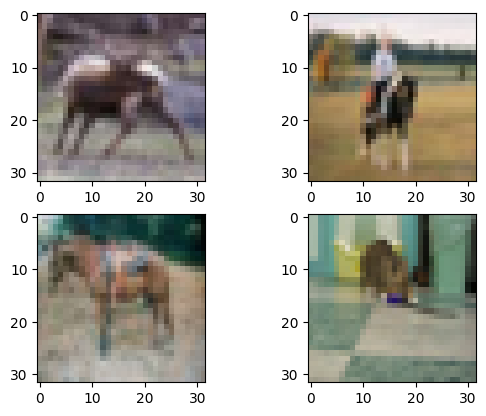

In [ ]:
fig, ax = plt.subplots(2, 2)# Your code here

ax[0, 0].imshow(data[0])# Your code here
ax[0, 1].imshow(data[1])# Your code here
ax[1, 0].imshow(data[2])# Your code here
ax[1, 1].imshow(data[3])# Your code here
plt.show()

Разбейте датасет на тренировочный, валидационный и тестовый наборы. Укажите аргументы `random_state=42`, `stratify`.

In [ ]:
# Your code here
x_train, x_tmp, y_train, y_tmp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size=0.2, random_state=42, stratify=y_tmp)
print("x_train", x_train.shape)
print("x_val", x_val.shape)
print("x_test", x_test.shape)

x_train (4000, 32, 32, 3)
x_val (800, 32, 32, 3)
x_test (200, 32, 32, 3)


Возьмите первую картинку из валидационного набора и найдите ее ближайшего соседа из тренировочного. **Не используйте** в задании библиотечную реализацию k-NN.

In [ ]:
def compute_L1(a, b):
    return np.sum(np.abs(a - b)) # Your code here

In [ ]:
# Your code here
distances = []
for i in range(len(x_train)):
    distances.append(compute_L1(x_val[0], x_train[i]))

In [ ]:
indx = np.argmin(distances)# Your code here
print(indx)

1074


**Отобразите эти картинки на subplots с `ncols=2`**

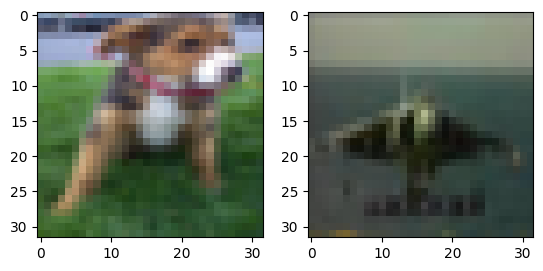

In [ ]:
fig, ax = plt.subplots(1, 2) # Your code here
ax[0].imshow(x_val[0])# Your code here
ax[1].imshow(x_train[indx])# Your code here
plt.show()

**Посмотрите, какой класс предсказывается**

In [ ]:
class_pred = y_train[indx]
class_to_idx = dataset.class_to_idx

print(list(class_to_idx.keys())[list(class_to_idx.values()).index(class_pred)])

airplane


Возьмите первую картинку из тестового набора и найдите k ее ближайших соседей (k-NN) из тренировочного набора.

Используйте `np.argsort()` или иной способ.

In [ ]:
k = 5
distances = []
for i in range(len(x_test)):
    distances.append(compute_L1(x_test[0], x_train[i]))
indx = np.argsort(distances)[0:k]
print(*indx)
 # Your code here

27 34 113 65 190


In [ ]:
x_test[0].shape

(32, 32, 3)

Отобразите ближайших соседей в виде subplots:

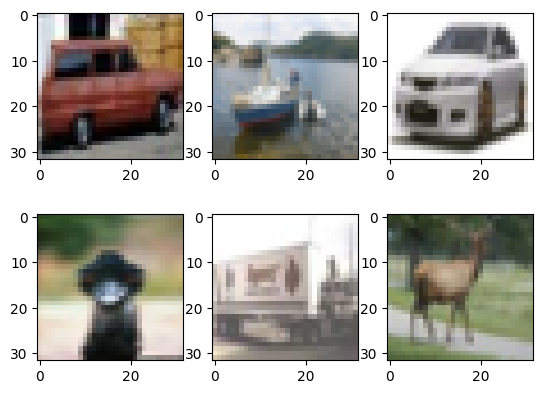

In [ ]:
fig, ax = plt.subplots(2, 3) # Your code here
ax[0, 0].imshow(x_test[0])# Your code here
ax[0, 1].imshow(x_test[indx[0]])# Your code here
ax[0, 2].imshow(x_test[indx[1]])# Your code here
ax[1, 0].imshow(x_test[indx[2]])# Your code here
ax[1, 1].imshow(x_test[indx[3]])# Your code here
ax[1, 2].imshow(x_test[indx[4]])# Your code here
# Your code here
plt.show()

Посчитайте k-NN для всего датасета.

Чем больше данных, тем дольше процесс. Реализуйте функцию для расчета расстояний. Если вы используете `for loops`, то сделайте к ним *progress bars* с помощью [tqdm](https://github.com/tqdm/tqdm).

Примечание: если используете вложенные циклы, то используйте `tqdm` только на внешнем цикле. Иначе время работы существенно увеличится.

In [ ]:
def compute_distances(train, val, distance_func):
    # Your code here
    distances = np.full((val.shape[0], train.shape[0]), np.inf)
    for i in tqdm(range(val.shape[0])):
        for j in range(train.shape[0]):
            distances[i,j] = distance_func(val[i], train[j])
    return distances

In [ ]:
distances = compute_distances(x_train, x_val, compute_L1)

  0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
len(distances)

800

Теперь найдите k ближайших соседей и предскажите класс.

Используйте моду [scipy.stats.mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) по ближайшим найденным соседям.

In [ ]:
def get_accuracy(distances, train_labels, val_labels, k):
    # Your code here
    indx_distances = []
    for i in range(len(distances)):
      indx_dist = (np.argsort(distances[i]))[:k]
      indx_distances.append(indx_dist)
    predicted_class = train_labels[indx_distances]
    predict_class = []
    for i in predicted_class:
      s = stats.mode(i, keepdims=True)
      predict_class.append(s.mode[0])
    accuracy = np.sum((val_labels == np.array(predict_class)))/len(val_labels)
    return accuracy

In [ ]:
accuracy = get_accuracy(distances, y_train, y_val, k)
print(f"Accuracy = {accuracy * 100:.0f}%")

Accuracy = 31%


**Посчитайте точность для k=1..100 и постройте график точности от k**

In [ ]:
acc = []
for k in tqdm(range(1, 100)):
    acc.append(get_accuracy(distances, y_train, y_val, k))
    # Your code here

  0%|          | 0/99 [00:00<?, ?it/s]

In [ ]:
print(f'Максимальное значение точности {max(acc)  * 100:.2f}% при k = {np.argmax(acc) + 1}')

Максимальное значение точности 32.00% при k = 9


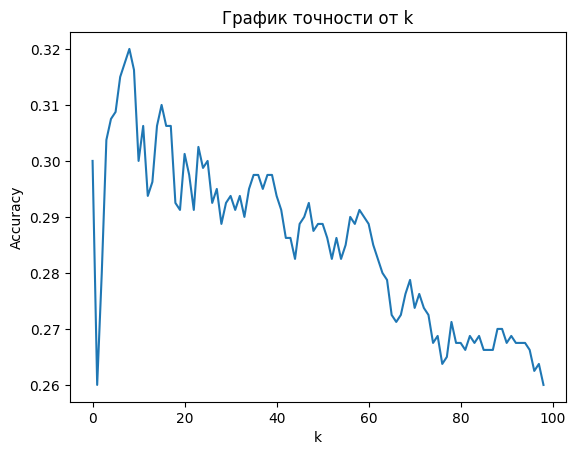

In [ ]:
plt.plot(acc)# Your code here
plt.title('График точности от k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Поменяйте расстоянние L1 на L2 и сравните точность на всем датасете.

In [ ]:
def compute_L2(a, b):
    return np.sqrt(np.sum((a - b) ** 2)) # Your code here

In [ ]:
distances_l2 = compute_distances(x_train, x_val, compute_L2)

  0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
acc_l2 = []
for k in tqdm(range(1, 100)):
    acc_l2.append(get_accuracy(distances_l2, y_train, y_val, k))
    # Your code here

  0%|          | 0/99 [00:00<?, ?it/s]

In [ ]:
print(f'Максимальное значение точности (без учета k = 1) {max(acc_l2[1:])  * 100:.2f}% при k = {acc_l2.index(max(acc_l2[1:])) + 1}')

Максимальное значение точности (без учета k = 1) 27.50% при k = 13


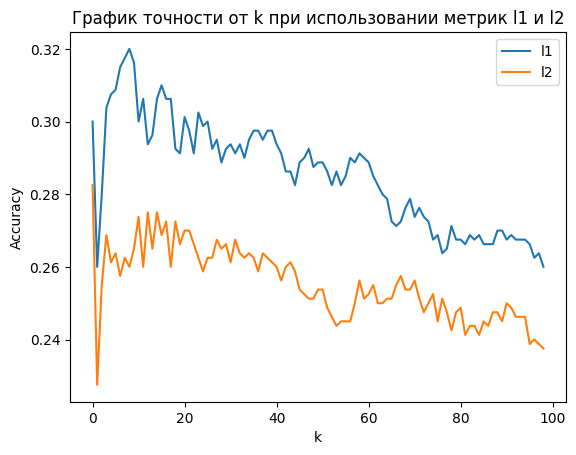

In [ ]:
plt.plot(acc, label='l1')# Your code here
plt.plot(acc_l2, label='l2')# Your code here
plt.title('График точности от k при использовании метрик l1 и l2')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Теперь, выбрав оптимальные параметры с помощью валидационного сета, проверьте качество на **тесте**..

*Примечание*. Для минимизации повторения кода можете сделать функцию из кода выше, в которую в качестве аргументов подаются различные наборы данных.

In [ ]:
# Your code here
distances = compute_distances(x_train, x_test, compute_L1)
print(f'На тестовом наборе точность {get_accuracy(distances, y_train, y_test, 9)  * 100:.2f}% при использовании метрики L1')
distances_l2 = compute_distances(x_train, x_test, compute_L2)
print(f'На тестовом наборе точность {get_accuracy(distances_l2, y_train, y_test, 13)  * 100:.2f}% при использовании метрики L2')

  0%|          | 0/200 [00:00<?, ?it/s]

На тестовом наборе точность 31.50% при использовании метрики L1


  0%|          | 0/200 [00:00<?, ?it/s]

На тестовом наборе точность 27.50% при использовании метрики L2


Совпали ли результаты с валидацией? Как думаете, почему?

**Результаты совпали с валидацией, поскольку при обучении модели были подобраны оптимальные гиперпараметры (число ближайших соседей k, метрика). Совпадение результатов теста и валидации говорит о том, что модель так или иначе научилась обобщать закономерности в данных (хотя и с низкой точностью).**

## Формат результата

* График сравнения точности для L1 и L2 при различных k. Выведите на одном графике результаты для валидации и теста.
* Число k, при котором достигается лучшая точность.
* Точность на тесте.

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX01/result_4_task.png" width="300">

# Задание 4. Реализация k-NN

В этом задании мы поработаем в концепции ОПП (Объектно-Ориентированного Программирования).

[ООП на Python: концепции, принципы и примеры реализации](https://proglib.io/p/python-oop)

Создайте класс k-NN и реализуйте его методы.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
from scipy.stats import mode
from torchvision import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Функция, которая считает расстояние L1 между 2-мя векторами:

In [ ]:
def compute_L1(a, b):
    return np.sum(np.abs(a - b)) # Your code here

Загрузите датасет CIFAR-10 и разбейте его на тренировочный, валидационный и тестовый наборы аналогично тому, как вы сделали это в задании 3. Укажите аргументы `random_state=42`, `stratify`.

In [ ]:
dataset = datasets.CIFAR10("content", train=True, download=True)

np.random.seed(42)
data, _, labels, _ = train_test_split(
    dataset.data / 255,  # Normalize
    np.array(dataset.targets),
    train_size=0.1,  # get only fraction of the dataset
    random_state=42,
    stratify=dataset.targets,
)

# Your code here
x_train, x_tmp, y_train, y_tmp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size=0.2, random_state=42, stratify=y_tmp)

Files already downloaded and verified


Создайте класс k-NN и реализуйте его методы.

In [ ]:
class kNN:
    def __init__(self, k, distance_func):
        self.k = k # Your code here
        self.distance_func = distance_func # Your code here

    def fit(self, x, y):
        self.train_data = x # Your code here
        self.train_labels = y # Your code here

    def predict(self, x):
        distances = self.compute_distances(x)
        indexes = np.argsort(distances, axis=1)[:, :self.k]
        labels_of_top_classes = self.train_labels[indexes]
        predicted_class, _ = mode(labels_of_top_classes, axis=1, keepdims=True)
        return predicted_class.flatten()

    def compute_distances(self, test):
        # Your code here
        distances = np.full((len(test), len(self.train_data)), np.inf)
        for i in tqdm(range(len(test))):
          for j in range(len(self.train_data)):
            distances[i,j] = self.distance_func(test[i], self.train_data[j])
        return distances

In [ ]:
kNN_classifier = kNN(k=1, distance_func=compute_L1)
kNN_classifier.fit(x=x_train, y=y_train)
out = kNN_classifier.predict(x_test)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
np.mean(y_test == out)

0.295

Сравните время работы вашей реализации и реализации из sklearn. Используйте `%%time`.

In [ ]:
# Your code here
%%time
kNN_classifier = kNN(k=9, distance_func=compute_L1)
kNN_classifier.fit(x=x_train, y=y_train)
out = kNN_classifier.predict(x_test)
np.mean(y_test == out)

  0%|          | 0/200 [00:00<?, ?it/s]

CPU times: user 16.2 s, sys: 109 ms, total: 16.3 s
Wall time: 16.9 s


0.315

In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors=9, metric="manhattan")
x_train_1 = np.reshape(x_train, (x_train.shape[0], 3072))
knn.fit(x_train_1, y_train)
y_pred = knn.predict(x_val.reshape(800,3072))
accuracy = accuracy_score(y_pred, y_val)
print("Accuracy:", f"{accuracy*100}%")# Your code here

Accuracy: 32.0%
CPU times: user 18.6 s, sys: 67.9 ms, total: 18.6 s
Wall time: 24.3 s


In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors=9, metric="manhattan")
knn.fit(x_train_1, y_train)
y_pred = knn.predict(x_test.reshape(200,3072))
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", f"{accuracy*100}%")# Your code here

Accuracy: 31.5%
CPU times: user 4.01 s, sys: 7.16 ms, total: 4.02 s
Wall time: 4.08 s


**Sklearn работает быстрее написанной реализации: 3.86 с против 13.7 с**

**Оптимальный k-NN. Погружение в ООП**

Эта часть задания даёт дополнительные баллы и не обязательна к выполнению.

Реализуйте выбор ближайших соседей эффективно. Можно сделать [KD дерево](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree), таким образом мы приблизимся к библиотечной реализации.

[[wiki] K-d tree](https://en.m.wikipedia.org/wiki/K-d_tree).

И сравните по эффективности как с исходной (простой) реализацией, так и с библиотечной.

In [ ]:
import random
import math
import numpy as np
from collections import Counter

class KnnBalltreeClassifier(object):
    '''Классификатор реализует взвешенное голосование по ближайшим соседям.
    При подсчете расcтояния используется l2-метрика.
    Поиск ближайшего соседа осуществляется поиском по ball-дереву.
    Параметры
    ----------
    n_neighbors : int, optional
        Число ближайших соседей, учитывающихся в голосовани
        - 'distance' : веса обратно пропорциональны расстоянию д о классифицируемого объекта
        -  функция, которая получает на вход массив расстояний и возвращает массив весов
    leaf_size: int, optional
        Максимально допустимый размер листа дерева
    '''
    class Node(object):
        def __init__(self, pivot = None, points = [], radius = None): #Индекс корня - 1
            self.pivot = pivot #Индекс левой верщины - 2*v
            self.radius = radius #Индекс правой вершины - 2*v + 1
            self.points = points
        def __str__(self):
            self.stringList = ''.join(str(symbol) for symbol in self.points)
            return("pivot = " + str(self.pivot) + " radius = " + str(self.radius) + " points = "
                + str(self.stringList))

    class Point(object):
            def __init__(self, point, index):
                self.point = point
                self.index = index
            def __str__(self):
                return("Vector " + str(self.point) + " with index " + str(self.index))

    def __init__(self, n_neighbors=1, leaf_size=30):
        if(n_neighbors <= 0):
            print("Ошибка! Соседей не может быть меньше, чем 1")
            return
        self.n_neighbors = n_neighbors
        self.leaf_size = leaf_size
        self.nodes = {}
        self.kNSet = set()
        self.points = []
        self.classes = []
        self.pointsOriginal = []

    def GetnpArrayOfPoints(self, xStruct):
        x = []
        for i in range(len(xStruct)):
            x.append(xStruct[i].point)
        return(np.array(x))

    def Distance(self, a, b):
        if(len(a) != len(b)):
            print("Размерности объектов не одинаковые!")
            return("Error")
        return np.linalg.norm(a-b)

    def GetMaxDistance(self, point, points):
        points = self.GetnpArrayOfPoints(points)
        point = point.point
        #print(points)

        max = 0
        for i in range(len(points)):
            currentDist = self.Distance(point, points[i])
            if(currentDist > max):
                max = currentDist
        return(max)

    def GetMaxSpreadDimension(self, x): #Нужно передать подотрезок array[a:b]
        x = self.GetnpArrayOfPoints(x)
        difference = []
        for i in range(x.shape[1]):
            maximum = x[0][i]
            minimum = x[0][i]
            for j in range(x.shape[0]):
                maximum = max(maximum, x[j][i])
                minimum = min(minimum, x[j][i])
            difference.append((maximum - minimum, i))
        return(max(difference)[1])

    def SortingByDimension(self, x, startPoint, endPoint, dimension): #Нужно передать начало и
        left = x[:startPoint]
        rigth = x[endPoint:]
        x = np.array(sorted(x[startPoint:endPoint], key = lambda Point: Point.point[dimension]))
        x = np.concatenate((left, x, rigth), 0)
        return(x)

    def GetCentroidIndex(self, x, dimension): #Нужно передать подотрезок array[a:b]
        x = self.GetnpArrayOfPoints(x)
        if(x.shape[0] == 0):
            print("Ошибка! Передан нулевой массив в поиск центроида")
        sum = 0
        for i in range(x.shape[0]): #Размер x не нулевой
            sum = sum + x[i][dimension]
        sum = sum / x.shape[0]
        minimum = abs(sum - x[0][dimension])
        index = 0
        for i in range(x.shape[0]):
            if(abs(x[i][dimension] - sum) < minimum):
                minimum = abs(x[i][dimension] - sum)
                index = i
        return(index)

    def ConstructTree(self, leafSize, vertexIndex, startPoint, endPoint):
        if(endPoint - startPoint <= 0):
            return #endPoint не включается в отрезок [ )


        dimension = self.GetMaxSpreadDimension(self.points[startPoint:endPoint])
        self.points = self.SortingByDimension(self.points, startPoint, endPoint, dimension)
        centroidIndex = self.GetCentroidIndex(self.points[startPoint:endPoint], dimension) + startPoint

        radius = self.GetMaxDistance(self.points[centroidIndex], self.points[startPoint:endPoint])
        self.nodes[vertexIndex] = self.Node(self.points[centroidIndex], [], radius)
        if(endPoint - startPoint <= leafSize):
            for i in range(startPoint, endPoint):
                self.nodes[vertexIndex].points.append(self.points[i])
            return
        else:
            self.nodes[vertexIndex].points.append(self.points[centroidIndex])
        self.ConstructTree(leafSize, vertexIndex * 2, startPoint, centroidIndex)
        self.ConstructTree(leafSize, vertexIndex * 2 + 1, centroidIndex + 1, endPoint)

    def searchBallSubtree(self, vertexIndex, newPoint, kN):
        if(len(self.nodes[vertexIndex].points) > 1):
            for point in self.nodes[vertexIndex].points:
                distance = self.Distance(newPoint, point.point)
                if(len(self.kNSet) >= kN and max(self.kNSet)[0] > distance):
                    self.kNSet.remove(max(self.kNSet))
                if(len(self.kNSet) < kN):
                    self.kNSet.add((distance, point.index))
            return
        leftChild = vertexIndex * 2
        rightChild = vertexIndex * 2 + 1
        distance = self.Distance(newPoint, self.nodes[vertexIndex].pivot.point)

        if(len(self.kNSet) >= kN and max(self.kNSet)[0] > distance):
            self.kNSet.remove(max(self.kNSet))
        if(len(self.kNSet) < kN):
            self.kNSet.add((distance, self.nodes[vertexIndex].pivot.index))

        if(len(self.nodes[leftChild].points) != 0):
            distance = self.Distance(newPoint, self.nodes[leftChild].pivot.point)
            if(len(self.kNSet) < kN or max(self.kNSet)[0] > distance - self.nodes[leftChild].radius):
                self.searchBallSubtree(leftChild, newPoint, kN)

        if(len(self.nodes[rightChild].points) != 0):
            distance = self.Distance(newPoint, self.nodes[rightChild].pivot.point)
            if(len(self.kNSet) < kN or max(self.kNSet)[0] > distance - self.nodes[rightChild].radius):
                self.searchBallSubtree(rightChild, newPoint, kN)


    def fit(self, x, y):
        if (len(x) != len(y)):
            print("Ошибка - не у всех точек определены классы")
            return("fit Error")
        self.points = []
        self.classes = []
        self.pointsOriginal = x
        for i in range(len(x)):
            self.points.append(self.Point(x[i], i))
        self.classes = y

        self.ConstructTree(self.leaf_size, 1, 0, len(self.points))
        return self

    def predict(self, x):
        predictions = []
        for i in range(len(x)):
            self.kNSet.clear()
            self.searchBallSubtree(1, x[i], self.n_neighbors)
            results = []
            for index in self.kNSet: #kNSet хранит пару (дистанция, индекс)
                results.append(self.classes[index[1]])
            resultClass = Counter(results).most_common()[0][0]
            predictions.append(resultClass)
        return np.array(predictions)

    def predict_proba(self, X):
        classesCount = np.unique(self.classes)
        results = []
        for point in X:
            neighborsClasses = self.get_kneighbors_classes(point)
            result = []
            for clas in classesCount:
                count = 0
                for neighborClass in neighborsClasses:
                    if(clas == neighborClass):
                        count += 1
                result.append(count/self.n_neighbors * 100)
            results.append(result)
        return(np.array(results))



    def get_kneighbors_classes(self, x):
        self.kNSet.clear()
        self.searchBallSubtree(1, x, self.n_neighbors)
        result = []
        for index in self.kNSet:
            result.append(self.classes[index[1]])
        return np.array(result)

    def kneighbors(self, x, n_neighbors):
        results = []
        for i in range(len(x)):
            self.kNSet.clear()
            self.searchBallSubtree(1, x[i], n_neighbors)
            result = []

            for index in self.kNSet:
                result.append(self.pointsOriginal[index[1]])
            results.append(result)
        return np.array(np.array(results))

In [ ]:
from torchvision import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.CIFAR10("content", train=True, download=True)

np.random.seed(42)
data, _, labels, _ = train_test_split(
    dataset.data / 255,  # Normalize
    np.array(dataset.targets),
    train_size=0.1,  # get only fraction of the dataset
    random_state=42,
    stratify=dataset.targets,
)

Files already downloaded and verified


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_tmp, y_train, y_tmp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size=0.2, random_state=42, stratify=y_tmp)

print("x_train", x_train.shape)
print("x_val", x_val.shape)
print("x_test", x_test.shape)

x_train (4000, 32, 32, 3)
x_val (800, 32, 32, 3)
x_test (200, 32, 32, 3)


In [ ]:
%%time
knnBalltree = KnnBalltreeClassifier(n_neighbors=9, leaf_size=30)
x_train_1 = np.reshape(x_train, (x_train.shape[0],3072))
x_val_1 = np.reshape(x_val, (x_val.shape[0],3072))
knnBalltree.fit(x_train_1, y_train)
y_pred = knnBalltree.predict(x_val.reshape(800,3072))
accuracy = accuracy_score(y_pred, y_val)
print("Accuracy:", f"{accuracy*100}%")# Your code here

Accuracy: 27.875%
CPU times: user 2min 39s, sys: 468 ms, total: 2min 39s
Wall time: 2min 42s


**Работает ощутимо медленнее и дает меньшую accuracy..**

## Формат результата

Демонстрация времени работы вашей реализации и реализации из sklearn (с помощью %%time)